# Proyecto 1 | Inteligencia Artificial
## Integrantes:
- **César Jiménez Salazar** - 2021052709
- **Maynor Martínez Hernández** - 2021052792
- **Fernanda Murillo Mena** - 2021077803

## Descripción
Este notebook corresponde al análisis de pruebas realizadas para el modelo de KNN.


## Pima Indians Diabetes Database
Actualemente se procede hacer los cambios aplicados al dataset, según el análisis previo, por tanto no se explicará el código previo, ya que este fue explciado y detallado en su sección.

#### **Cargar dataset** 

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Load dataset
df_diabetes = pd.read_csv('diabetes.csv')


#### **Eliminar filas duplicadas**



In [61]:
# Check for duplicate rows and remove them
print(df_diabetes.duplicated().sum())

0


#### **Imputación de datos**


In [62]:
# Check for missing values for 0 in columns except for the 'Pregnancies' column and 'Outcome' column and replace them with the mean of the respective column
df_diabetes['Glucose'] = df_diabetes['Glucose'].replace(0, np.nan)
df_diabetes['BloodPressure'] = df_diabetes['BloodPressure'].replace(0, np.nan)
df_diabetes['SkinThickness'] = df_diabetes['SkinThickness'].replace(0, np.nan)
df_diabetes['Insulin'] = df_diabetes['Insulin'].replace(0, np.nan)
df_diabetes['BMI'] = df_diabetes['BMI'].replace(0, np.nan)
df_diabetes['DiabetesPedigreeFunction'] = df_diabetes['DiabetesPedigreeFunction'].replace(0, np.nan)
df_diabetes['Age'] = df_diabetes['Age'].replace(0, np.nan)
df_diabetes.fillna(df_diabetes.mean(), inplace=True)

#### **Remover outliers**


In [63]:
from scipy import stats
import numpy as np
# Calculate Z-scores for each numerical feature in the DataFrame
z_scores = np.abs(stats.zscore(df_diabetes.select_dtypes(include=[np.number])))

# Set a threshold for identifying outliers, typically 3
threshold = 3
# Create a boolean DataFrame where Z-scores exceed the threshold
outliers = (z_scores > threshold)
df_no_outliers = df_diabetes[~(outliers).any(axis=1)]

print(f"Original DataFrame size: {df_diabetes.shape}")
print(f"DataFrame size without outliers: {df_no_outliers.shape}")


Original DataFrame size: (768, 9)
DataFrame size without outliers: (719, 9)


### **Dataset Pima Indians Diabetes Database**
En esta sección se procede a realizar el preprocesamiento de datos para el dataset *Pima Indians Diabetes Database*. 

Nótese que cada prueba hace una division de datos en training (80%) y testing (20%). Esto ya que las pruebas consisten en combinaciones del conjunto de datos, que seguirán el siguiente orden:

#### 1. **Dataset Original** 
- Solo el conjunto tal y como se describe
- Normalización
- Estandarización

#### 2. **Conjunto de datos original sin la columna de Embarazos** `sin [Pregnancies]`
- Solo el conjunto tal y como se describe
- Normalización
- Estandarización

#### 3. **Conjunto de datos sin outliers** `Sin Outliers`
- Solo el conjunto tal y como se describe
- Normalización
- Estandarización

#### 4. **Conjunto de datos sin outliers y sin la columna de Embarazos** `Sin outliers y sin [Pregnancies]`
- Solo el conjunto tal y como se describe
- Normalización
- Estandarización

#### 5. **Sobre muestreo** `Oversampling, sin outliers, sin [Pregnancies]`
- Solo el conjunto tal y como se describe
- Normalización
- Estandarización
    

#### Funciones útiles

In [64]:
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.xticks([0.5, 1.5], ['Non-diabetic', 'Diabetic'], ha='right')
    plt.yticks([0.5, 1.5], ['Non-diabetic', 'Diabetic'], va='center')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, title):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Define function to calculate weighted score
def weighted_score(accuracy, recall, precision):
    return (0.4 * accuracy) + (0.3 * recall) + (0.3 * precision)

In [65]:
random_state_result = 20

#### Dataset Original
Se utiliza el conjunto de datos en su forma original, sin realizar modificaciones. Esto establece una línea base para entender cómo se comporta el modelo con los datos en su estado más puro.

Original Dataset - Without Scaling
Accuracy: 0.6883116883116883
Precision: 0.5510204081632653
Recall: 0.5094339622641509


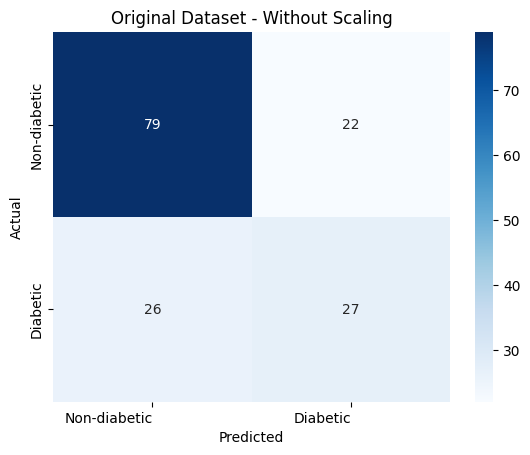

In [66]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Split the data into features and target variable
X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state_result)


# Train the KNN model with the original dataset without scaling
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_original = knn.predict(X_test)

# Calculate and print metrics
print("Original Dataset - Without Scaling")
print(f"Accuracy: {accuracy_score(y_test, y_pred_original)}")
print(f"Precision: {precision_score(y_test, y_pred_original)}")
print(f"Recall: {recall_score(y_test, y_pred_original)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Original Dataset - Without Scaling")


Original Dataset - Normalization
Accuracy: 0.7662337662337663
Precision: 0.6666666666666666
Recall: 0.6415094339622641


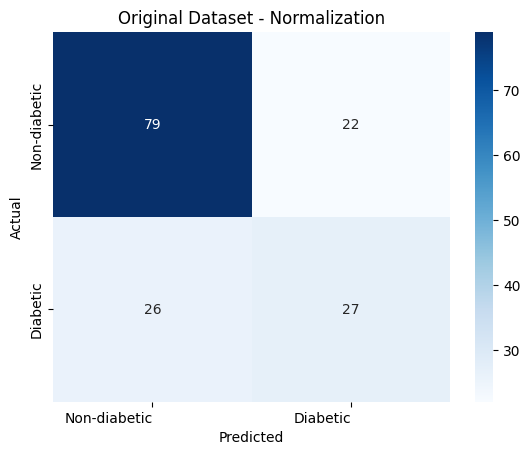

In [67]:

# Normalize the features
scaler_norm = MinMaxScaler()
X_train_normalized = scaler_norm.fit_transform(X_train)
X_test_normalized = scaler_norm.transform(X_test)

# Train the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_normalized, y_train)

# Predict on the test set
y_pred_norm = knn.predict(X_test_normalized)

# Calculate and print the metrics
print("Original Dataset - Normalization")
print(f"Accuracy: {accuracy_score(y_test, y_pred_norm)}")
print(f"Precision: {precision_score(y_test, y_pred_norm)}")
print(f"Recall: {recall_score(y_test, y_pred_norm)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Original Dataset - Normalization")


Original Dataset - Standardization
Accuracy: 0.7662337662337663
Precision: 0.660377358490566
Recall: 0.660377358490566


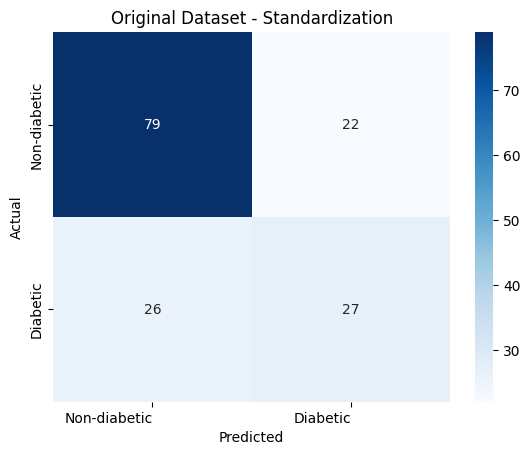

In [68]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler_std = StandardScaler()
X_train_standardized = scaler_std.fit_transform(X_train)
X_test_standardized = scaler_std.transform(X_test)

# Train the KNN model
knn.fit(X_train_standardized, y_train)
y_pred_std = knn.predict(X_test_standardized)

# Calculate and print the metrics
print("Original Dataset - Standardization")
print(f"Accuracy: {accuracy_score(y_test, y_pred_std)}")
print(f"Precision: {precision_score(y_test, y_pred_std)}")
print(f"Recall: {recall_score(y_test, y_pred_std)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Original Dataset - Standardization")


#### Conjunto de datos original sin la columna de Embarazos `sin [Pregnancies]`
Al conjunto de datos original, se le eliminó la característica relacionada con los embarazos. Ya que se sabe que la característica de embarazos no es relevante para el problema en estudio y este puede sesgar el modelo.

Original Dataset without Pregnancies Column - Without Scaling
Accuracy: 0.7077922077922078
Precision: 0.58
Recall: 0.5471698113207547


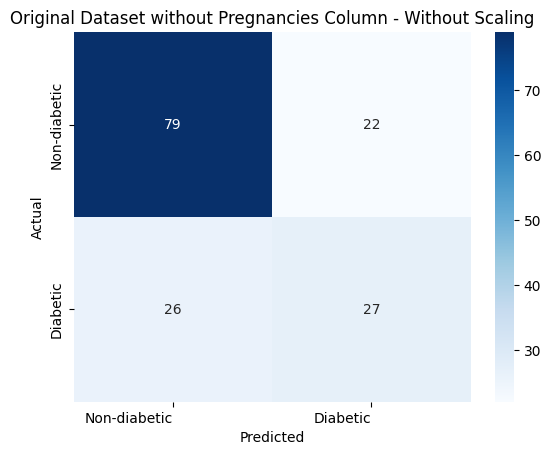

In [69]:
# Drop the 'Pregnancies' column
X_no_preg = df_diabetes.drop(['Outcome', 'Pregnancies'], axis=1)
X_train_no_preg, X_test_no_preg, y_train, y_test = train_test_split(X_no_preg, y, test_size=0.2, random_state=random_state_result)
knn.fit(X_train_no_preg, y_train)
y_pred_no_preg = knn.predict(X_test_no_preg)

# Calculate and print the metrics
print("Original Dataset without Pregnancies Column - Without Scaling")
print(f"Accuracy: {accuracy_score(y_test, y_pred_no_preg)}")
print(f"Precision: {precision_score(y_test, y_pred_no_preg)}")
print(f"Recall: {recall_score(y_test, y_pred_no_preg)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Original Dataset without Pregnancies Column - Without Scaling")


Original Dataset without Pregnancies Column - Normalization
Accuracy: 0.7337662337662337
Precision: 0.62
Recall: 0.5849056603773585


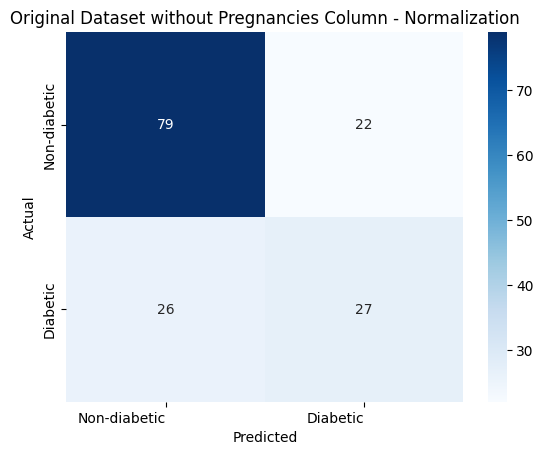

In [70]:

# Normalize the features
X_train_no_preg_normalized = scaler_norm.fit_transform(X_train_no_preg)
X_test_no_preg_normalized = scaler_norm.transform(X_test_no_preg)
knn.fit(X_train_no_preg_normalized, y_train)
y_pred_no_preg_norm = knn.predict(X_test_no_preg_normalized)

# Calculate and print the metrics
print("Original Dataset without Pregnancies Column - Normalization")
print(f"Accuracy: {accuracy_score(y_test, y_pred_no_preg_norm)}")
print(f"Precision: {precision_score(y_test, y_pred_no_preg_norm)}")
print(f"Recall: {recall_score(y_test, y_pred_no_preg_norm)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Original Dataset without Pregnancies Column - Normalization")


Original Dataset without Pregnancies Column - Standardization
Accuracy: 0.7467532467532467
Precision: 0.6346153846153846
Recall: 0.6226415094339622


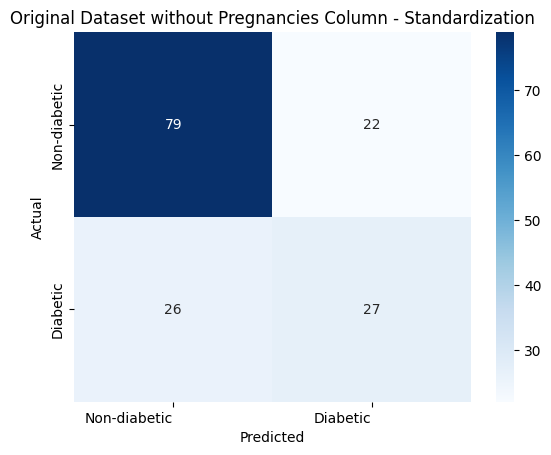

In [71]:
# Standardize the features
X_train_no_preg_standardized = scaler_std.fit_transform(X_train_no_preg)
X_test_no_preg_standardized = scaler_std.transform(X_test_no_preg)
knn.fit(X_train_no_preg_standardized, y_train)
y_pred_no_preg_std = knn.predict(X_test_no_preg_standardized)

# Calculate and print the metrics
print("Original Dataset without Pregnancies Column - Standardization")
print(f"Accuracy: {accuracy_score(y_test, y_pred_no_preg_std)}")
print(f"Precision: {precision_score(y_test, y_pred_no_preg_std)}")
print(f"Recall: {recall_score(y_test, y_pred_no_preg_std)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Original Dataset without Pregnancies Column - Standardization")


#### Conjunto de datos sin outliers `Sin Outliers`
Se limpian los datos eliminando los valores atípicos (outliers), lo que puede mejorar la precisión del modelo al eliminar anomalías que podrían llevar a sobreajustes o interpretaciones erróneas.

Dataset No Outliers - Without Scaling
Accuracy: 0.7361111111111112
Precision: 0.5526315789473685
Recall: 0.5


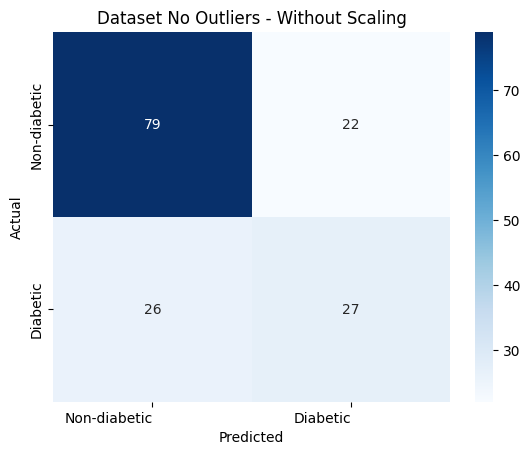

In [72]:
# Split the data without outliers into features and target variable
X_no_outliers = df_no_outliers.drop('Outcome', axis=1)
y_no_outliers = df_no_outliers['Outcome']

# Split the data into training and testing sets
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=random_state_result)
knn.fit(X_train_no_outliers, y_train_no_outliers)
y_pred_no_outliers = knn.predict(X_test_no_outliers)

# Calculate and print metrics
print("Dataset No Outliers - Without Scaling")
print(f"Accuracy: {accuracy_score(y_test_no_outliers, y_pred_no_outliers)}")
print(f"Precision: {precision_score(y_test_no_outliers, y_pred_no_outliers)}")
print(f"Recall: {recall_score(y_test_no_outliers, y_pred_no_outliers)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Dataset No Outliers - Without Scaling")



Dataset No Outliers - Normalization
Accuracy: 0.7638888888888888
Precision: 0.5869565217391305
Recall: 0.6428571428571429


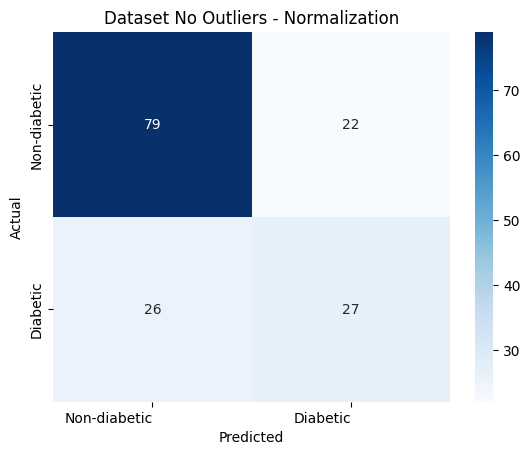

In [73]:

# Normalize the features
X_train_no_outliers_normalized = scaler_norm.fit_transform(X_train_no_outliers)
X_test_no_outliers_normalized = scaler_norm.transform(X_test_no_outliers)
knn.fit(X_train_no_outliers_normalized, y_train_no_outliers)
y_pred_no_outliers_norm = knn.predict(X_test_no_outliers_normalized)

# Calculate and print the metrics
print("Dataset No Outliers - Normalization")
print(f"Accuracy: {accuracy_score(y_test_no_outliers, y_pred_no_outliers_norm)}")
print(f"Precision: {precision_score(y_test_no_outliers, y_pred_no_outliers_norm)}")
print(f"Recall: {recall_score(y_test_no_outliers, y_pred_no_outliers_norm)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Dataset No Outliers - Normalization")


Dataset No Outliers - Standardization
Accuracy: 0.7708333333333334
Precision: 0.5918367346938775
Recall: 0.6904761904761905


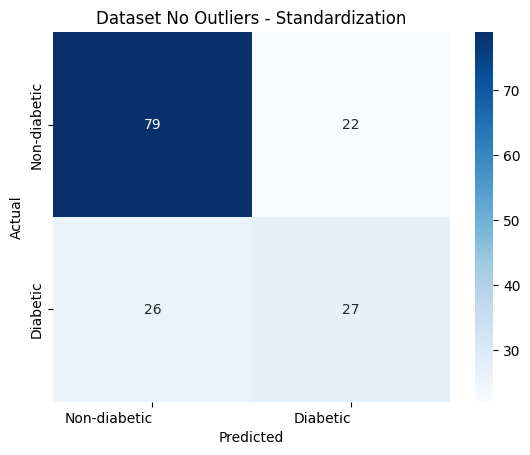

In [74]:
# Standardize the features
X_train_no_outliers_standardized = scaler_std.fit_transform(X_train_no_outliers)
X_test_no_outliers_standardized = scaler_std.transform(X_test_no_outliers)
knn.fit(X_train_no_outliers_standardized, y_train_no_outliers)
y_pred_no_outliers_std = knn.predict(X_test_no_outliers_standardized)

# Calculate and print the metrics
print("Dataset No Outliers - Standardization")
print(f"Accuracy: {accuracy_score(y_test_no_outliers, y_pred_no_outliers_std)}")
print(f"Precision: {precision_score(y_test_no_outliers, y_pred_no_outliers_std)}")
print(f"Recall: {recall_score(y_test_no_outliers, y_pred_no_outliers_std)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Dataset No Outliers - Standardization")


#### Conjunto de datos sin outliers y sin la columna de Embarazos `Sin outliers y sin [Pregnancies]`
Combina la eliminación de outliers con la exclusión de la característica de embarazos. Este enfoque permite observar la limpieza profunda de datos en el rendimiento del modelo.

Dataset No Outliers without Pregnancies Column - Without Scaling
Accuracy: 0.7361111111111112
Precision: 0.5526315789473685
Recall: 0.5


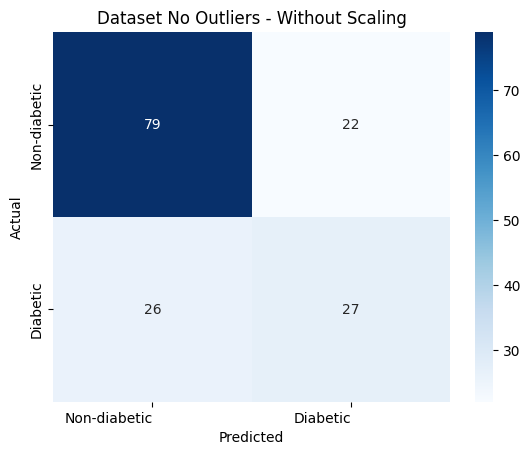

In [75]:
# Drop the 'Pregnancies' column from the dataset without outliers
X_no_outliers_no_preg = df_no_outliers.drop(['Outcome', 'Pregnancies'], axis=1)
X_train_no_outliers_no_preg, X_test_no_outliers_no_preg, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers_no_preg, y_no_outliers, test_size=0.2, random_state=random_state_result)

knn.fit(X_train_no_outliers_no_preg, y_train_no_outliers)
y_pred_no_outliers_no_preg = knn.predict(X_test_no_outliers_no_preg)

# Calculate and print metrics
print("Dataset No Outliers without Pregnancies Column - Without Scaling")
print(f"Accuracy: {accuracy_score(y_test_no_outliers, y_pred_no_outliers_no_preg)}")
print(f"Precision: {precision_score(y_test_no_outliers, y_pred_no_outliers_no_preg)}")
print(f"Recall: {recall_score(y_test_no_outliers, y_pred_no_outliers_no_preg)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Dataset No Outliers - Without Scaling")


Dataset No Outliers without Pregnancies Column - Normalization
Accuracy: 0.7777777777777778
Precision: 0.6136363636363636
Recall: 0.6428571428571429


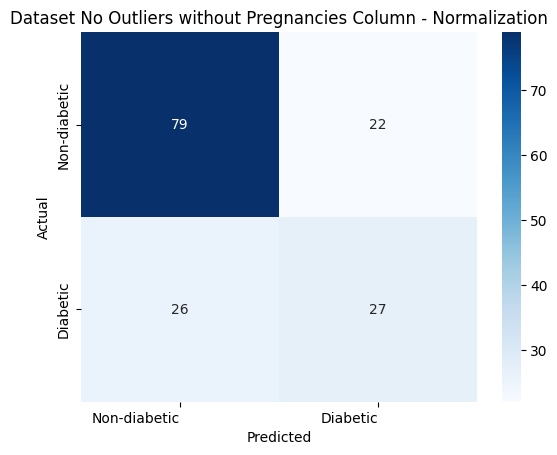

In [76]:
# Normalize the features
X_train_no_outliers_no_preg_normalized = scaler_norm.fit_transform(X_train_no_outliers_no_preg)
X_test_no_outliers_no_preg_normalized = scaler_norm.transform(X_test_no_outliers_no_preg)

knn.fit(X_train_no_outliers_no_preg_normalized, y_train_no_outliers)
y_pred_no_outliers_no_preg_norm = knn.predict(X_test_no_outliers_no_preg_normalized)

# Calculate and print the metrics
print("Dataset No Outliers without Pregnancies Column - Normalization")
print(f"Accuracy: {accuracy_score(y_test_no_outliers, y_pred_no_outliers_no_preg_norm)}")
print(f"Precision: {precision_score(y_test_no_outliers, y_pred_no_outliers_no_preg_norm)}")
print(f"Recall: {recall_score(y_test_no_outliers, y_pred_no_outliers_no_preg_norm)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Dataset No Outliers without Pregnancies Column - Normalization")


Dataset No Outliers without Pregnancies Column - Standardization
Accuracy: 0.8125
Precision: 0.6666666666666666
Recall: 0.7142857142857143


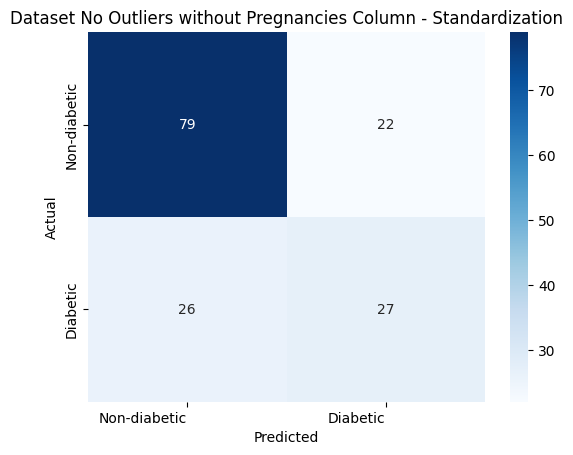

In [77]:
# Standardize the features
X_train_no_outliers_no_preg_standardized = scaler_std.fit_transform(X_train_no_outliers_no_preg)
X_test_no_outliers_no_preg_standardized = scaler_std.transform(X_test_no_outliers_no_preg)

knn.fit(X_train_no_outliers_no_preg_standardized, y_train_no_outliers)
y_pred_no_outliers_no_preg_std = knn.predict(X_test_no_outliers_no_preg_standardized)

# Calculate and print the metrics
print("Dataset No Outliers without Pregnancies Column - Standardization")
print(f"Accuracy: {accuracy_score(y_test_no_outliers, y_pred_no_outliers_no_preg_std)}")
print(f"Precision: {precision_score(y_test_no_outliers, y_pred_no_outliers_no_preg_std)}")
print(f"Recall: {recall_score(y_test_no_outliers, y_pred_no_outliers_no_preg_std)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Dataset No Outliers without Pregnancies Column - Standardization")


#### Sobre muestreo `Oversampling (SOMTE), sin outliers, sin [Pregnancies]`
Se aplica técnicas de oversampling para aumentar la representación de las clases minoritarias en el conjunto de datos

Oversampled Dataset - Without Scaling
Accuracy: 0.7120418848167539
Precision: 0.6391752577319587
Recall: 0.7560975609756098


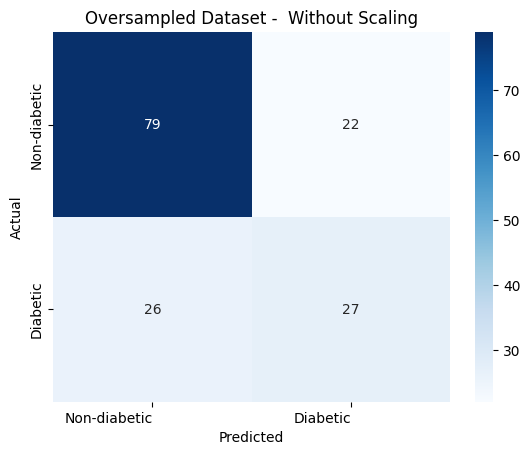

In [78]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=random_state_result)
X_smote, y_smote = smote.fit_resample(X_no_outliers_no_preg, y_no_outliers)

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=random_state_result)
# Train the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_smote, y_train_smote)
y_pred_smote = knn.predict(X_test_smote)

print("Oversampled Dataset - Without Scaling")
print(f"Accuracy: {accuracy_score(y_test_smote, y_pred_smote)}")
print(f"Precision: {precision_score(y_test_smote, y_pred_smote)}")
print(f"Recall: {recall_score(y_test_smote, y_pred_smote)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Oversampled Dataset -  Without Scaling")


Oversampled No Outliers Dataset - Normalization
Accuracy: 0.743455497382199
Precision: 0.6701030927835051
Recall: 0.7926829268292683


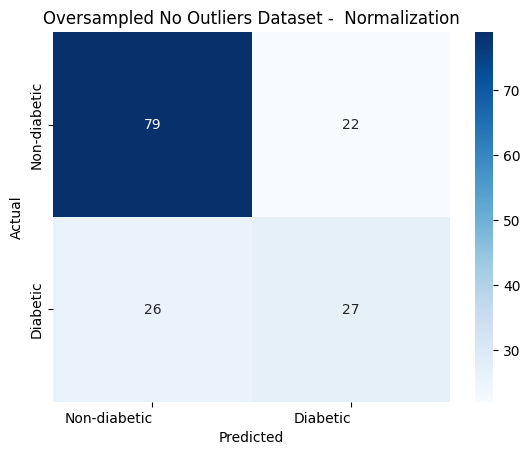

In [79]:

# Normalize the features
X_train_no_outliers_smote_no_preg_norm = scaler_norm.fit_transform(X_train_smote)
X_test_no_outliers_smote_no_preg_norm = scaler_norm.transform(X_test_smote)


knn.fit(X_train_no_outliers_smote_no_preg_norm, y_train_smote)
y_pred_no_outliers_smote_std = knn.predict(X_test_no_outliers_smote_no_preg_norm)

print("Oversampled No Outliers Dataset - Normalization")
print(f"Accuracy: {accuracy_score(y_test_smote, y_pred_no_outliers_smote_std)}")
print(f"Precision: {precision_score(y_test_smote, y_pred_no_outliers_smote_std)}")
print(f"Recall: {recall_score(y_test_smote, y_pred_no_outliers_smote_std)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Oversampled No Outliers Dataset -  Normalization")


Oversampled No Outliers Dataset - Standardization
Accuracy: 0.7486910994764397
Precision: 0.673469387755102
Recall: 0.8048780487804879


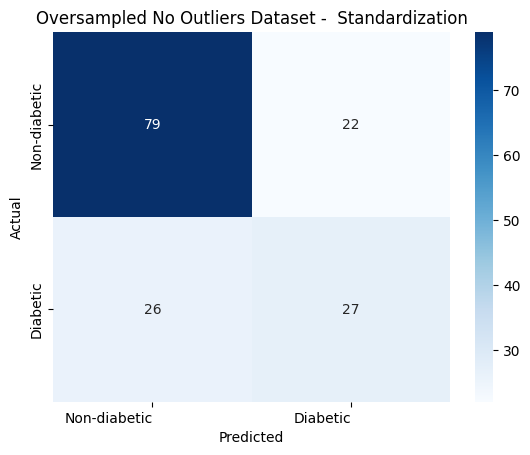

In [80]:

scaler_std = StandardScaler()
X_train_no_outliers_smote_standardized = scaler_std.fit_transform(X_train_smote)
X_test_no_outliers_smote_standardized = scaler_std.transform(X_test_smote)

knn.fit(X_train_no_outliers_smote_standardized, y_train_smote)
y_pred_no_outliers_smote_std = knn.predict(X_test_no_outliers_smote_standardized)

print("Oversampled No Outliers Dataset - Standardization")
print(f"Accuracy: {accuracy_score(y_test_smote, y_pred_no_outliers_smote_std)}")
print(f"Precision: {precision_score(y_test_smote, y_pred_no_outliers_smote_std)}")
print(f"Recall: {recall_score(y_test_smote, y_pred_no_outliers_smote_std)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Oversampled No Outliers Dataset -  Standardization")


#### Análisis más profundo
Una vez aplicado el las pruebas individuales según el dataset, se puede ver concluir que el mejor resultado es `Oversample No Outliers - Normalization`, sin emabrgo el modelo de entrenamiento tiene un hiperparámetros que se debería probar en este caso el valor de `k`. Por tanto una vez hecha las pruebas para mútilples K, también se hará la pruebas cambiando el `random_seed` y con esto obtener los 5 mejores resultados según la distribución de pesos `weight_score`

Original Dataset            - random=20  -  K=3 - Without Scaling : Accuracy=0.70, Precision=0.57, Recall=0.57 Weighted Score=0.62, AUC=0.69
Original Dataset            - random=20  -  K=3 - Normalization   : Accuracy=0.74, Precision=0.62, Recall=0.64 Weighted Score=0.67, AUC=0.73
Original Dataset            - random=20  -  K=3 - Standardization : Accuracy=0.74, Precision=0.61, Recall=0.66 Weighted Score=0.68, AUC=0.75
Orig Dataset no Preg        - random=20  -  K=3 - Without Scaling : Accuracy=0.71, Precision=0.58, Recall=0.55 Weighted Score=0.62, AUC=0.69
Orig Dataset no Preg        - random=20  -  K=3 - Normalization   : Accuracy=0.69, Precision=0.55, Recall=0.53 Weighted Score=0.60, AUC=0.71
Orig Dataset no Preg        - random=20  -  K=3 - Standardization : Accuracy=0.69, Precision=0.56, Recall=0.57 Weighted Score=0.61, AUC=0.71
Dataset No Outliers         - random=20  -  K=3 - Without Scaling : Accuracy=0.72, Precision=0.51, Recall=0.45 Weighted Score=0.58, AUC=0.69
Dataset No Ou

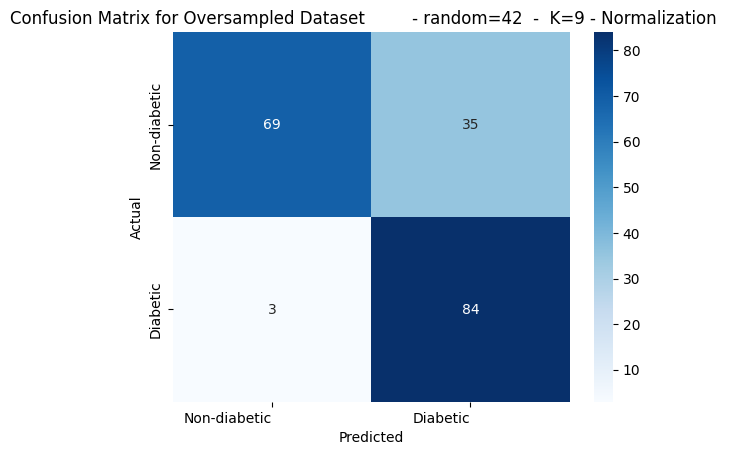

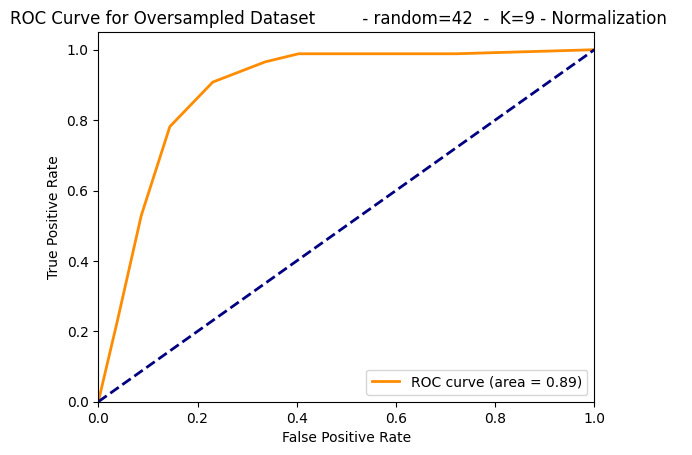

Oversampled Dataset         - random=42  -  K=3 - Standardization : Weighted Score=0.81, AUC=0.86


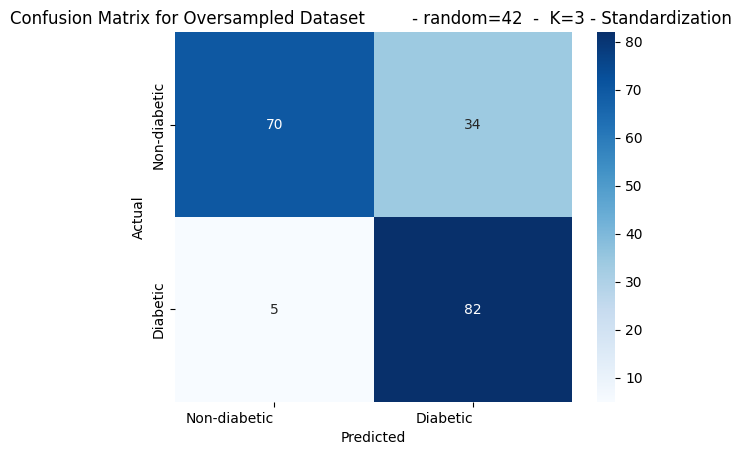

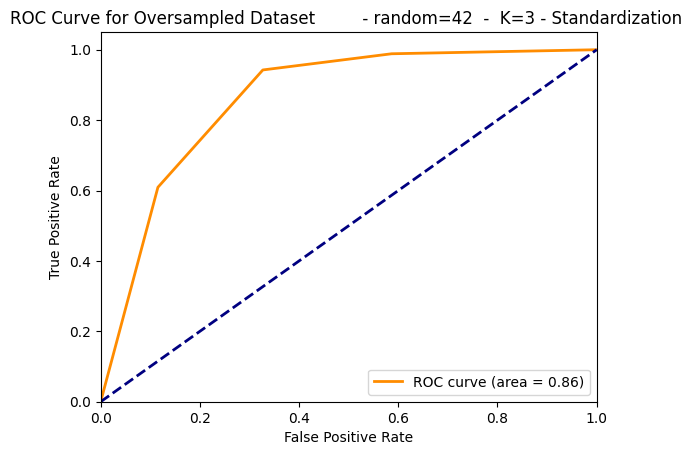

Oversampled Dataset         - random=42  -  K=5 - Normalization   : Weighted Score=0.81, AUC=0.86


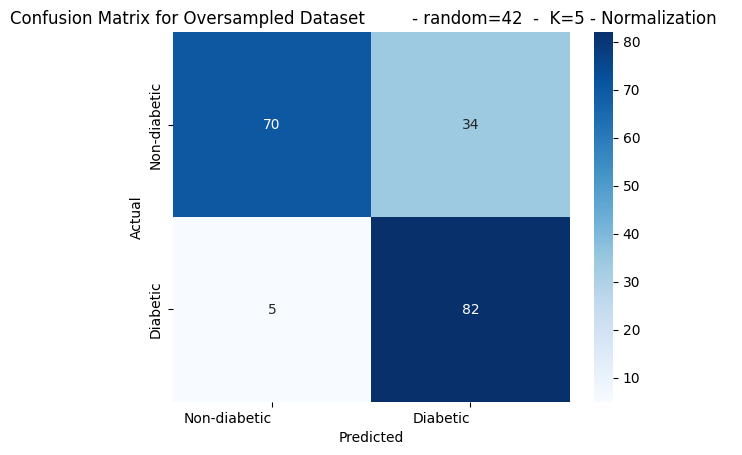

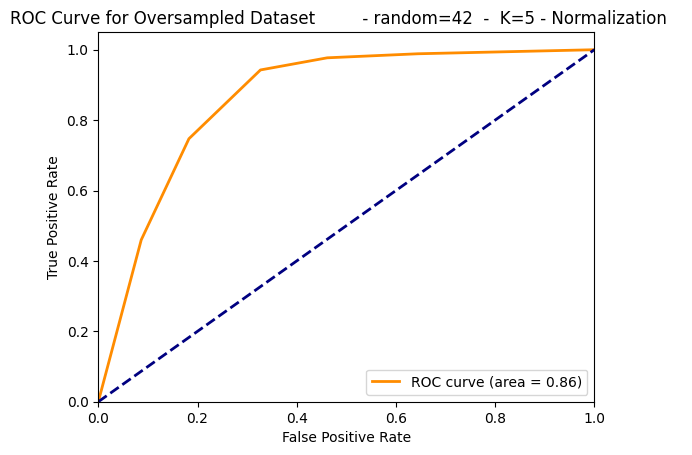

Oversampled Dataset         - random=42  -  K=5 - Standardization : Weighted Score=0.81, AUC=0.88


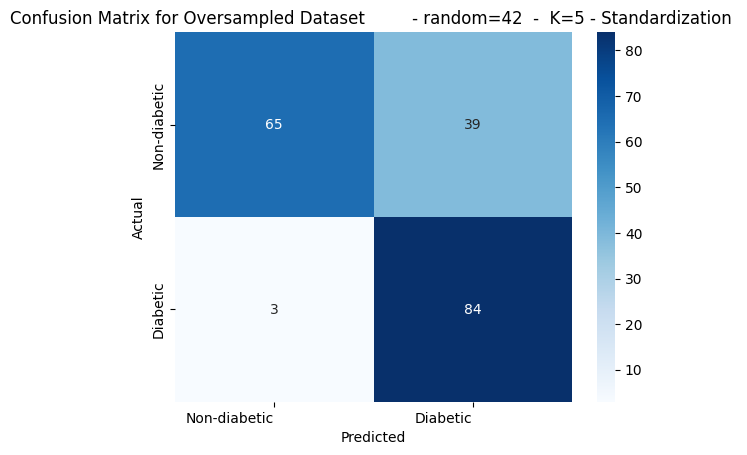

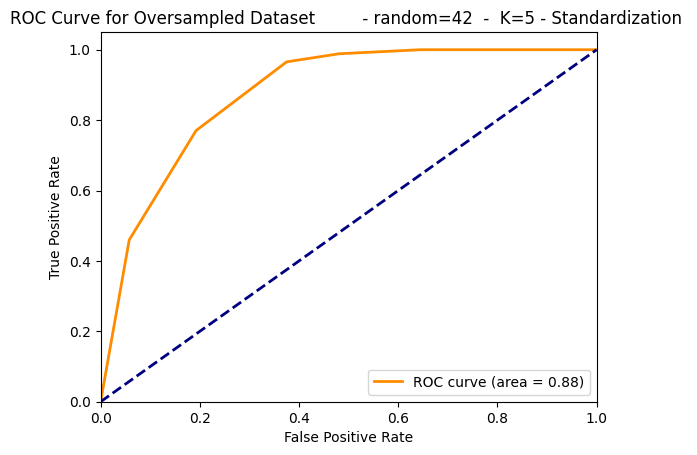

Oversampled Dataset         - random=80  -  K=9 - Standardization : Weighted Score=0.81, AUC=0.85


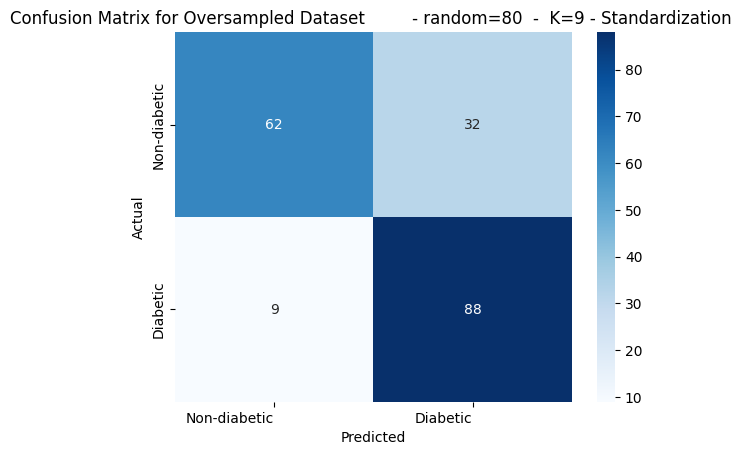

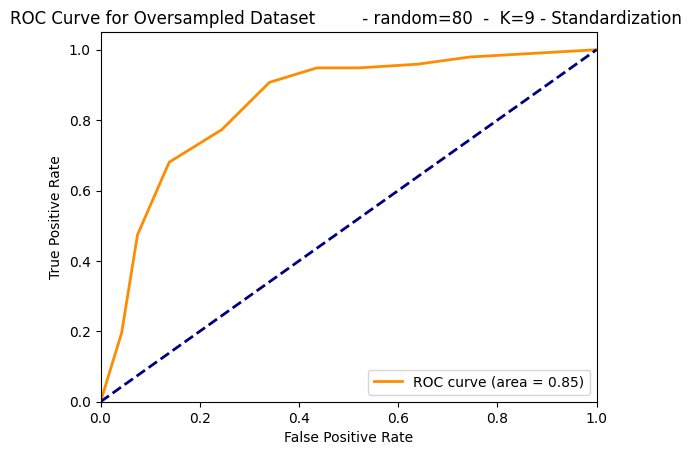

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, auc, roc_curve



# Scalers initialization
scaler_norm = MinMaxScaler()
scaler_std = StandardScaler()

# K values to test
k_values = [3, 5, 9]

# Tests to perform
tests = [
    ('Original Dataset', X, y),
    ('Orig Dataset no Preg', X_no_preg, y),
    ('Dataset No Outliers', X_no_outliers, y_no_outliers),
    ('Dataset No Outliers no Preg', X_no_outliers_no_preg, y_no_outliers),
    ('Oversampled Dataset', X_smote, y_smote)
]

# Dictionary to store the best tests based on weighted score and include metrics for confusion matrix and AUC
best_tests = {}

random_state_result_knn = [20,73,42,80]  

for random_knn in random_state_result_knn:
    for k in k_values:
        for test_name, x_dataset, y_dataset in tests:
            # Splitting the dataset
            X_train, X_test, y_train, y_test = train_test_split(x_dataset, y_dataset, test_size=0.2, random_state=random_knn)
            knn = KNeighborsClassifier(n_neighbors=k)

            # Loop through different data preprocessing techniques
            for scale_method, (X_train_scaled, X_test_scaled) in [('Without Scaling', (X_train, X_test)), 
                                                                ('Normalization', (scaler_norm.fit_transform(X_train), scaler_norm.transform(X_test))), 
                                                                ('Standardization', (scaler_std.fit_transform(X_train), scaler_std.transform(X_test)))]:
                knn.fit(X_train_scaled, y_train)
                y_pred = knn.predict(X_test_scaled)
                acc = accuracy_score(y_test, y_pred)
                prec = precision_score(y_test, y_pred)
                rec = recall_score(y_test, y_pred)
                cm = confusion_matrix(y_test, y_pred)
                fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test_scaled)[:, 1])
                roc_auc = auc(fpr, tpr)

                # Storing results
                test_key = f"{test_name:27} - random={random_knn}  -  K={k} - {scale_method:16}"
                best_tests[test_key] = {
                    'weighted_score': weighted_score(acc, rec, prec),
                    'confusion_matrix': cm,
                    'fpr': fpr, 
                    'tpr': tpr,
                    'roc_auc': roc_auc
                }
                print(f"{test_key}: Accuracy={acc:.2f}, Precision={prec:.2f}, Recall={rec:.2f} Weighted Score={best_tests[test_key]['weighted_score']:.2f}, AUC={roc_auc:.2f}")

# Identify the three best tests based on the weighted score
top_5_tests = sorted(best_tests, key=lambda x: best_tests[x]['weighted_score'], reverse=True)[:5]
print("\nTop 5 tests based on weighted score:")
for test in top_5_tests:
    print(f"{test}: Weighted Score={best_tests[test]['weighted_score']:.2f}, AUC={best_tests[test]['roc_auc']:.2f}")

    # Plotting confusion matrix and ROC curve for the top 3 tests
    plot_confusion_matrix(best_tests[test]['confusion_matrix'], f"Confusion Matrix for {test}")
    plot_roc_curve(best_tests[test]['fpr'], best_tests[test]['tpr'], best_tests[test]['roc_auc'], f"ROC Curve for {test}")


## Heart Failure Prediction Dataset
Se procederá a realizar las mismas pruebas aplicadas al dataset de Pima Indians Diabetes, adaptándolas al dataset de Heart Failure Prediction.


#### **Cargar dataset** 

In [82]:
# Load dataset
df_heart = pd.read_csv('heart.csv')

#### **Eliminar filas duplicadas**

In [83]:
# Check for duplicate rows and remove them
print(df_heart.duplicated().sum())

0


#### **Label Enconding**

In [84]:
# Label codification 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_heart['Sex'] = le.fit_transform(df_heart['Sex'])
df_heart['ExerciseAngina'] = le.fit_transform(df_heart['ExerciseAngina'])
df_heart['ChestPainType'] = le.fit_transform(df_heart['ChestPainType'])
df_heart['RestingECG'] = le.fit_transform(df_heart['RestingECG'])
df_heart['ST_Slope'] = le.fit_transform(df_heart['ST_Slope'])

#### **Imputación de datos**

In [85]:
df_heart['Cholesterol'] = df_heart['Cholesterol'].replace(0, np.nan)
df_heart.fillna(df_heart.mean(), inplace=True)

#### **Remover outliers**

In [86]:
# Calculate Z-scores for each numerical feature in the DataFrame
z_scores = np.abs(stats.zscore(df_heart.select_dtypes(include=[np.number])))

# Set a threshold for identifying outliers, typically 3
threshold = 3
# Create a boolean DataFrame where Z-scores exceed the threshold
outliers = (z_scores > threshold)
df_heart_no_outliers = df_heart[~(outliers).any(axis=1)]

print(f"Original DataFrame size: {df_heart.shape}")
print(f"DataFrame size without outliers: {df_heart_no_outliers.shape}")

Original DataFrame size: (918, 12)
DataFrame size without outliers: (890, 12)


### **Heart Failure Prediction Dataset**
En esta sección, se llevará a cabo el preprocesamiento de datos y la implementación de modelos de entrenamiento para el dataset de Heart Failure Prediction. Se aplicarán las mismas pruebas realizadas previamente en el dataset de Pima Indians Diabetes, adaptándolas a las particularidades de este nuevo conjunto de datos.

Cabe destacar que cada prueba dividirá los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%). Las pruebas consistirán en diferentes combinaciones de datos, organizadas de la siguiente manera:

#### 1. **Dataset Original** 
- Conjunto de datos tal como se encuentra, sin modificaciones adicionales.
- Normalización.
- Estandarización.

#### 2. **Dataset Original sin la columna 'Cholesterol'** `sin [Cholesterol]`
- Conjunto de datos sin la columna 'Cholesterol'.
- Normalización.
- Estandarización.

#### 3. **Dataset sin outliers** `Sin Outliers`
- Datos sin valores atípicos.
- Normalización.
- Estandarización.

#### 4. **Dataset sin outliers y sin la columna 'Cholesterol'** `Sin outliers y sin [Cholesterol]`
- Datos sin valores atípicos y sin la columna 'Cholesterol'.
- Normalización.
- Estandarización.

#### 5. **Sobremuestreo** `Oversampling, sin outliers, sin [Cholesterol]`
- Técnica de sobremuestreo aplicada a los datos sin valores atípicos y sin la columna 'Cholesterol'.
- Normalización.
- Estandarización.



### **Automatización de pruebas en el Heart Failure Prediction Dataset**

Debido a la complejidad y la extensión del análisis, se ha decidido omitir las pruebas individuales preliminares para el dataset de Heart Failure Prediction. En su lugar, se procederá por un enfoque de fuerza bruta que nos permitirá evaluar sistemáticamente múltiples configuraciones y transformaciones de datos de manera automatizada. Este método proporcionará una visión más amplia y objetiva de qué configuraciones producen los mejores resultados con el modelo KNN.

Sin emabrgo el script de fuerza bruta evaluará las mismas pruebas anteriormentes mencionasdas:

1. **Dataset Original**: Uso del dataset tal como está, sin modificaciones adicionales.
2. **Dataset sin 'Cholesterol'**: Exclusión de la variable 'Cholesterol', que podría no ser relevante para todos los modelos.
3. **Dataset sin Outliers**: Eliminación de outliers para mejorar la generalización del modelo.
4. **Dataset sin Outliers y sin 'Cholesterol'**: Combinación de la exclusión de outliers y la variable 'Cholesterol'.
5. **Oversampling**: Aplicación de técnicas de sobremuestreo para abordar el desequilibrio de clases.

Esta metodología permite cubrir un espectro amplio de escenarios, identificando las configuraciones que mejor se adaptan a las peculiaridades del dataset de Heart Failure Prediction y al modelo KNN.


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, auc, roc_curve

# Initialization of scalers
scaler_norm_heart = MinMaxScaler()
scaler_std_heart = StandardScaler()

# K values to test
k_values_heart = [3, 5, 9]

# Tests to perform with the Heart Failure Prediction dataset
tests_heart = [
    ('Heart Original Dataset', X_heart, y_heart),
    ('Heart Orig Dataset no Cholesterol', X_heart_no_chol, y_heart),
    ('Heart Dataset No Outliers', X_heart_no_outliers, y_heart_no_outliers),
    ('Heart Dataset No Outliers no Chol', X_heart_no_outliers_no_chol, y_heart_no_outliers),
    ('Heart Oversampled Dataset', X_heart_smote, y_heart_smote)
]

# Dictionary to store the best tests based on weighted score and include metrics for confusion matrix and AUC
best_tests_heart = {}

random_state_result_heart = [20, 73, 42, 80]

for random_heart in random_state_result_heart:
    for k in k_values_heart:
        for test_name, x_dataset, y_dataset in tests_heart:
            # Splitting the dataset
            X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(x_dataset, y_dataset, test_size=0.2, random_state=random_heart)
            knn_heart = KNeighborsClassifier(n_neighbors=k)

            # Loop through different data preprocessing techniques
            for scale_method, (X_train_scaled, X_test_scaled) in [('Without Scaling', (X_train_heart, X_test_heart)), 
                                                                  ('Normalization', (scaler_norm_heart.fit_transform(X_train_heart), scaler_norm_heart.transform(X_test_heart))), 
                                                                  ('Standardization', (scaler_std_heart.fit_transform(X_train_heart), scaler_std_heart.transform(X_test_heart)))]:
                knn_heart.fit(X_train_scaled, y_train_heart)
                y_pred_heart = knn_heart.predict(X_test_scaled)
                acc_heart = accuracy_score(y_test_heart, y_pred_heart)
                prec_heart = precision_score(y_test_heart, y_pred_heart)
                rec_heart = recall_score(y_test_heart, y_pred_heart)
                cm_heart = confusion_matrix(y_test_heart, y_pred_heart)
                fpr_heart, tpr_heart, _ = roc_curve(y_test_heart, knn_heart.predict_proba(X_test_scaled)[:, 1])
                roc_auc_heart = auc(fpr_heart, tpr_heart)

                # Storing results
                test_key_heart = f"{test_name:30} - Random={random_heart} - K={k} - {scale_method:15}"
                best_tests_heart[test_key_heart] = {
                    'weighted_score': weighted_score(acc_heart, rec_heart, prec_heart),
                    'confusion_matrix': cm_heart,
                    'fpr': fpr_heart, 
                    'tpr': tpr_heart,
                    'roc_auc': roc_auc_heart
                }
                print(f"{test_key_heart}: Accuracy={acc_heart:.2f}, Precision={prec_heart:.2f}, Recall={rec_heart:.2f}, Weighted Score={best_tests_heart[test_key_heart]['weighted_score']:.2f}, AUC={roc_auc_heart:.2f}")

# Identify the top 5 tests based on the weighted score
top_5_tests_heart = sorted(best_tests_heart, key=lambda x: best_tests_heart[x]['weighted_score'], reverse=True)[:5]
print("\nTop 5 tests based on weighted score:")
for test in top_5_tests_heart:
    print(f"{test}: Weighted Score={best_tests_heart[test]['weighted_score']:.2f}, AUC={best_tests_heart[test]['roc_auc']:.2f}")

    # Plotting confusion matrix and ROC curve for the top 5 tests
    plot_confusion_matrix(best_tests_heart[test]['confusion_matrix'], f"Confusion Matrix for {test}")
    plot_roc_curve(best_tests_heart[test]['fpr'], best_tests_heart[test]['tpr'], best_tests_heart[test]['roc_auc'], f"ROC Curve for {test}")


NameError: name 'X_heart' is not defined